In [1]:
# Big Data and Economics Group Project: Predicting the outcome of the Brexit Referendum
# Sean O'Donohoe, Horace Kwan, Teng Loi

In [2]:
# Motivation

# We will try various methods of feature selection and model estimation to try and identify the best approach to analyse
# small, high dimensional data sets. We will first estimate models using OLS, where features are selected through a) filter 
# method, b) backwards elimination, where features are then screened using correlation coefficients, c) recursive feature 
# selection, and d) Lasso regularisation. Models will then be estimated using logistic regression, where models will contain
# features selected in the same way as for OLS models. We will then explore models estimated using the RandomForestClassifier
# and then AdaBoostClassifier. 

# NB: all measures of performance will displayed towards the end, after all of the models have been generated. 

In [3]:
# First, we import all of the modules we will be using, and read in the data using the read_csv function. Naturally, in all
# models ex post facto fatures will be removed from the explanatory dataset, and the dependent variable will be 'Pct_Leave'
# for models generated using OLS, and 'outcome' (=1 if area voted to leave, =0 otherwise) for models generated using logistic
# regression and random forests.

import sklearn as sk
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cm
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv('data.csv')
data.shape

(353, 95)

In [16]:
# We will now estimate models using logistic regression to see if this improves performace. We will produce four models using
# the same features as the models used above, therefore we will not repeat any of the feature selection methods. It is worth
# noting that we will no longer be able to use MSE as a performance metric, and will instead be using area under curve (AUC)
# value. 

In [17]:
# First, we generate a logistic regression model with features chosen through the filter method:

LR7X = data[['MEP_UKIPPct', 'ind2001_Retail_sh', 'ind2001_Manufacturing_sh', 'EU_2001Migrantshare', 'quall1_sh_growth',
             'ind2001_Construction_sh']]
LR7Y = data['outcome']

LR7X_train, LR7X_test, LR7Y_train, LR7Y_test = train_test_split(LR7X, LR7Y, test_size=0.33,random_state=0)
logreg = LogisticRegression()
logreg.fit(LR7X_train, LR7Y_train)
LR7Y_pred=logreg.predict(LR7X_test)

# Generating confusion matrix and AUC
LR7cnf_matrix = metrics.confusion_matrix(LR7Y_test, LR7Y_pred)
LR7Y_pred_proba = logreg.predict_proba(LR7X_test)[::,1]
LR7fpr, LR7tpr, _ = metrics.roc_curve(LR7Y_test,  LR7Y_pred_proba)
LR7auc = metrics.roc_auc_score(LR7Y_test, LR7Y_pred_proba)

C:\Users\Altairhorace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
# Next, we generate a logistic regression model with features chosen through backwards elimination:

LRBEX = data[['mean_hourly_pay_growth', 'MEP_UKIPPct', 'MEP_GreenPct', 'MEP_BNPPct', 'TREATED_WITHIN_62_DAYS',
           'life_sat_mean', 'life_sat_cv',  'quall1_2001_sh','ind2001_Mining_sh', 'ManufacturingShareGrowth',
           'TransportShareGrowth', 'CouncilRented2001']]
LRBEY = data[['outcome']]

LRBEX_train, LRBEX_test, LRBEY_train, LRBEY_test = train_test_split(LRBEX, LRBEY, test_size=0.33,random_state=0)
logreg.fit(LRBEX_train, LRBEY_train)
LRBEY_pred=logreg.predict(LRBEX_test)


# Generating confusion matrix and AUC
LRBEcnf_matrix = metrics.confusion_matrix(LRBEY_test, LRBEY_pred)
LRBEY_pred_proba = logreg.predict_proba(LRBEX_test)[::,1]
LRBEfpr, LRBEtpr, _ = metrics.roc_curve(LRBEY_test,  LRBEY_pred_proba)
LRBEauc = metrics.roc_auc_score(LRBEY_test, LRBEY_pred_proba)

C:\Users\Altairhorace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Altairhorace\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
# Next, we generate a logistic regression model with features chosen through  recursive selection:

LRRFX = data[['EU75Leaveshare', 'pensionergrowth20012011', 'ResidentAge30to44share',
       'ResidentAge45to59share', 'ResidentAge60plusshare',
       'median_hourly_pay2005', 'median_hourly_pay_growth',
       'mean_hourly_pay_growth', 'EU_2001Migrantshare',
       'NONEU_2001Migrantshare', 'EU_Migrantgrowth', 'NONEU_Migrantgrowth',
       'unqualifiedsharechange', 'umemployment_rate_aps',
       'economic_activity_rate_aps2015', 'MEP_ConPct', 'MEP_LDPct',
       'MEP_UKIPPct', 'MEP_GreenPct', 'MEP_BNPPct',
       'Total_EconomyEU_dependence', 'TREATED_WITHIN_62_DAYS', 'life_sat_mean',
       'life_sat_cv', 'noqual_2001_sh', 'quall1_2001_sh', 'quall2_2001_sh',
       'quall3_2001_sh', 'quall4plus_2001_sh', 'noqual_sh_growth',
       'quall1_sh_growth', 'quall2_sh_growth', 'quall3_sh_growth',
       'quall4plus_sh_growth', 'ind2001_Agriculture_sh', 'ind2001_Mining_sh',
       'ind2001_Manufacturing_sh', 'ind2001_Construction_sh',
       'ind2001_Retail_sh', 'ind2001_HotelRestaurant_sh',
       'ind2001_Transport_sh', 'ind2001_Finance_sh', 'AgricultureShareGrowth',
       'MiningShareGrowth', 'ManufacturingShareGrowth',
       'ConstructionShareGrowth', 'RetailShareGrowth',
       'HotelRestaurantShareGrowth', 'TransportShareGrowth',
       'FinanceShareGrowth', 'ResidentUnder30share', 'PrivateRentedshare2001',
       'Ownedshare2001', 'CouncilRented2001', 'CouncilRentedGrowth',
       'PrivateRentedGrowth', 'OwnedshareGrowth', 'PublicEmployment2014',
       'PublicEmployment2009', 'PublicEmploymentGrowth',
       'MigrantEUAccessionGrowth', 'MigrantOldEUMemberGrowth',
       'MigrantElsewhereGrowth', 'InitialEUAccession', 'InitialOldEUMember',
       'InitialElsewhere', 'rr_1', 'rr_2', 'rr_3', 'rr_4', 'rr_5', 'rr_7',
       'rr_8', 'rr_9', 'rr_10', 'rr_11', 'rr_12', 'cc_1', 'cc_3', 'cc_4']]

LRRFY = data[['outcome']]

LRRFX_train, LRRFX_test, LRRFY_train, LRRFY_test = train_test_split(LRRFX, LRRFY, test_size=0.33,random_state=0)
logreg.fit(LRRFX_train, LRRFY_train)
LRRFY_pred=logreg.predict(LRRFX_test)

# Generating confusion matrix and AUC
LRRFcnf_matrix = metrics.confusion_matrix(LRRFY_test, LRRFY_pred)
LRRFY_pred_proba = logreg.predict_proba(LRRFX_test)[::,1]
LRRFfpr, LRRFtpr, _ = metrics.roc_curve(LRRFY_test,  LRRFY_pred_proba)
LRRFauc = metrics.roc_auc_score(LRRFY_test, LRRFY_pred_proba)

C:\Users\Altairhorace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Altairhorace\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# Next, we generate a logistic regression model with features chosen through Lasso regularisation:

LRLX = data[['median_hourly_pay2005', 'MEP_GreenPct', 'TREATED_WITHIN_62_DAYS', 'MEP_LDPct', 'MEP_ConPct',
           'TotalImpactFLWAAYR', 'self_employment_rate_aps', 'MEP_Turnout', 'economic_activity_rate_aps2015',
           'umemployment_rate_aps', 'MEP_UKIPPct', 'MEP_BNPPct']]

LRLY = data[['outcome']]

LRLX_train, LRLX_test, LRLY_train, LRLY_test = train_test_split(LRLX, LRLY, test_size=0.33,random_state=0)
logreg.fit(LRLX_train, LRLY_train)
LRLY_pred=logreg.predict(LRLX_test)

# Generating confusion matrix and AUC
LRLcnf_matrix = metrics.confusion_matrix(LRLY_test, LRLY_pred)
LRLY_pred_proba = logreg.predict_proba(LRLX_test)[::,1]
LRLfpr, LRLtpr, _ = metrics.roc_curve(LRLY_test,  LRLY_pred_proba)
LRLauc = metrics.roc_auc_score(LRLY_test, LRLY_pred_proba)

C:\Users\Altairhorace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Altairhorace\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
# We will now generate random forest models to check if these perform any better. We will be using the RandomForestClassifier
# and the AdaBoostClassieir. For the RandomForestClassifier models, we will produce 2: (a) will select features automactially,
# and we will only adjust function parameters, and (b) will select only the most important features.

# RandomForestClassifier (a) model:

RFXa = data.drop(['Pct_Turnout','Votes_Cast', 'Valid_Votes', 'Remain', 'outcome',
                  'Leave','Pct_Remain','Pct_Leave','Pct_Rejected'], axis=1)
RFYa = data['outcome']
RFXa_train, RFXa_test, RFYa_train, RFYa_test = train_test_split(RFXa, RFYa, test_size = .33, random_state=0)

# Training/fitting the model
RFa = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
            oob_score=None, random_state=1, verbose=0,
            warm_start=False)

# NB: information gains appear to be exhausted after max_depth>8; we have tried values from 0 to 30, and precision/accuracy/
# recall scores are not affected beyong max_depth = 8. 

RFa.fit(RFXa_train, RFYa_train)  
RFYa_pred = RFa.predict(RFXa_test) 

# Generating confusion matrix and AUC
RFacnf_matrix = metrics.confusion_matrix(RFYa_test, RFYa_pred)
RFYa_pred_proba = RFa.predict_proba(RFXa_test)[::,1]
RFafpr, RFatpr, _ = metrics.roc_curve(RFYa_test,  RFYa_pred_proba)
RFaauc = metrics.roc_auc_score(RFYa_test, RFYa_pred_proba)

In [22]:
# RandomForestClassifier (b) model; most important features only:

# Finding important features
feature_importances = pd.DataFrame(RFa.feature_importances_,
                                   index = RFXa_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(20)

,importance
MEP_UKIPPct,0.379231
quall4plus_2001_sh,0.195039
EU75Leaveshare,0.110084
MEP_GreenPct,0.056168
MEP_LabPct,0.051997
noqual_2001_sh,0.033047
InitialEUAccession,0.032465
quall1_sh_growth,0.030109
quall1_2001_sh,0.028517
PrivateRentedGrowth,0.026404


In [23]:
# We now generate a random forest (b) based on the above features with non-zero importance:

RFXb = data[['MEP_UKIPPct', 'quall4plus_2001_sh', 'EU75Leaveshare', 'MEP_GreenPct', 'MEP_LabPct', 'noqual_2001_sh',
            'InitialEUAccession', 'quall1_sh_growth', 'quall1_2001_sh', 'PrivateRentedGrowth', 'CouncilRented2001',
            'quall2_2001_sh', 'ind2001_Mining_sh', 'unqualifiedsharechange', 'mean_hourly_pay_growth', 'RetailShareGrowth',
            'TransportShareGrowth', 'TotalImpactFLWAAYR']]  
RFYb = data['outcome']                                       

RFXb_train, RFXb_test, RFYb_train, RFYb_test = train_test_split(RFXb, RFYb, test_size=0.70, random_state=5)

RFb = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
            oob_score=None, random_state=1, verbose=0,
            warm_start=False)

RFb.fit(RFXb_train, RFYb_train)  
RFYb_pred = RFb.predict(RFXb_test)

# Generating confusion matrix and AUC
RFbcnf_matrix = metrics.confusion_matrix(RFYb_test, RFYb_pred)
RFYb_pred_proba = RFb.predict_proba(RFXb_test)[::,1]
RFbfpr, RFbtpr, _ = metrics.roc_curve(RFYb_test,  RFYb_pred_proba)
RFbauc = metrics.roc_auc_score(RFYb_test, RFYb_pred_proba)

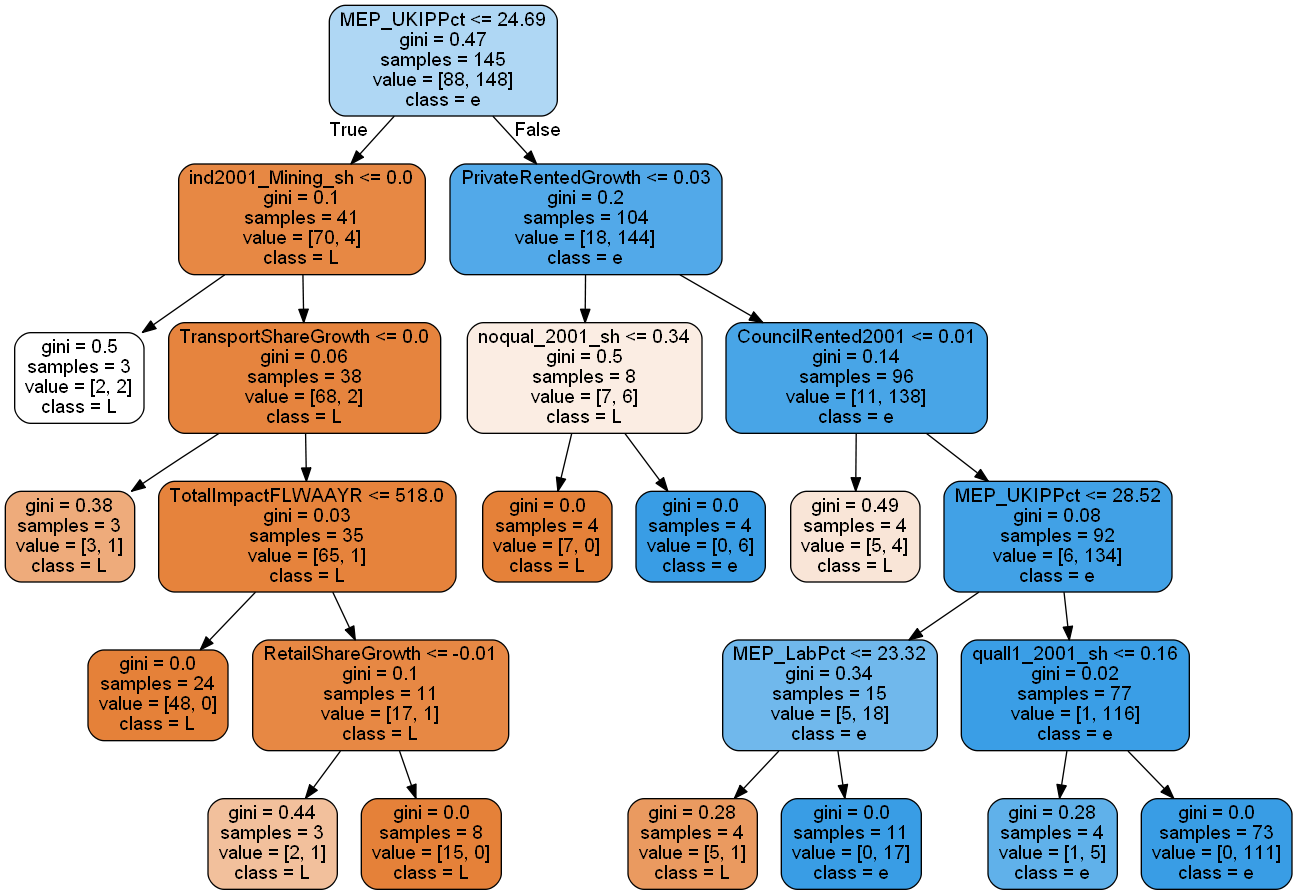

In [38]:
# Visualisation of the RF
# sys and pydotplus may need to be installed to Anaconda 

tree=RFa.estimators_[1]
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', 
                feature_names = RFXa_train.columns.values.tolist(),
                class_names = ["Remain", "Leave"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
import pydotplus
pydot_graph = pydotplus.graph_from_dot_file("tree.dot")
from IPython.display import Image
Image(pydot_graph.create_png())

In [ ]:
# We will now generate a model using AdaBoostClassifier:
# By default an AdaBoostClassifier is boosting a decision tree classifier

RFABCX = data.drop(['Pct_Turnout','Votes_Cast', 'Valid_Votes', 'Remain', 'outcome',
                  'Leave','Pct_Remain','Pct_Leave','Pct_Rejected'], axis=1)
RFABCY = data['outcome']
RFABCX_train, RFABCX_test, RFABCY_train, RFABCY_test = train_test_split(RFABCX, RFABCY, test_size = .33, random_state=0)

ABC = AdaBoostClassifier(base_estimator=None, n_estimators=1000, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
RFABC = ABC.fit(RFABCX_train, RFABCY_train)
RFABCY_pred = ABC.predict(RFABCX_test)

# Printing important features, so that we know what the model is using: 

ABCfeature_importances = pd.DataFrame(ABC.feature_importances_,
                                   index = RFABCX_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

ABCfeature_importances.head(40)

In [ ]:
# Generating confusion matrix and AUC
RFABCcnf_matrix = metrics.confusion_matrix(RFABCY_test, RFABCY_pred)
RFABCY_pred_proba = ABC.predict_proba(RFABCX_test)[::,1]
RFABCfpr, RFABCtpr, _ = metrics.roc_curve(RFABCY_test,  RFABCY_pred_proba)
RFABCauc = metrics.roc_auc_score(RFABCY_test, RFABCY_pred_proba)

In [ ]:
# Summary of all results: 

# OLS, filter method
print("OLS, filter method")
print("Confusion matrix:")
print(YPC7bcnf_matrix)
print("Accuracy:",metrics.accuracy_score(YPC7b_test, YPC7b_pred))
print("Precision:",metrics.precision_score(YPC7b_test, YPC7b_pred))
print("Recall:",metrics.recall_score(YPC7b_test, YPC7b_pred))
print("Training MSE:", PC7train_mse)
print("Test MSE:", PC7test_mse)
print("")

# OLS, backwards elimination
print("OLS, backwards elimination")
print("Confusion matrix:")
print(BEcnf_matrix)
print("Accuracy:",metrics.accuracy_score(BEYc_test, BEYc_pred))
print("Precision:",metrics.precision_score(BEYc_test, BEYc_pred))
print("Recall:",metrics.recall_score(BEYc_test, BEYc_pred))
print("Training MSE:", BEtrain_mse)
print("Test MSE:", BEtest_mse)
print("")

# OLS, recursive feature selection
print("OLS, recursive feature elimination")
print("Confusion matrix:")
print(RFcnf_matrix)
print("Accuracy:",metrics.accuracy_score(RFYd_test, RFYd_pred))
print("Precision:",metrics.precision_score(RFYd_test, RFYd_pred))
print("Recall:",metrics.recall_score(RFYd_test, RFYd_pred))
print("Training MSE:", RFYtrain_mse)
print("Test MSE:", RFYtest_mse)
print("")

# OLS, Lasso regulairsation
print("OLS, Lasso regularisation")
print("Confusion matrix:")
print(LYcnf_matrix)
print("Accuracy:",metrics.accuracy_score(Le_test, Le_pred))
print("Precision:",metrics.precision_score(Le_test, Le_pred))
print("Recall:",metrics.recall_score(Le_test, Le_pred))
print("Training MSE:", Ltrain_mse)
print("Test MSE:", Ltest_mse)
print("")

# Logistic regression, filter method
print("Logistic regression, filter method")
print("Confusion matrix:")
print(LR7cnf_matrix)
print("Accuracy:",metrics.accuracy_score(LR7Y_test, LR7Y_pred))
print("Precision:",metrics.precision_score(LR7Y_test, LR7Y_pred))
print("Recall:",metrics.recall_score(LR7Y_test, LR7Y_pred))
print(LRLauc)
print("")
plt.plot(LR7fpr,LR7tpr,label="data 1, auc="+str(LR7auc))
plt.plot([0, 1], [0, 1],'k-.')
plt.legend(loc=4)
plt.show()

# Logistic regression, backwards elimination
print("Logistic regression, backwards elimination")
print("Confusion matrix:")
print(LRBEcnf_matrix)
print("Accuracy:",metrics.accuracy_score(LRBEY_test, LRBEY_pred))
print("Precision:",metrics.precision_score(LRBEY_test, LRBEY_pred))
print("Recall:",metrics.recall_score(LRBEY_test, LRBEY_pred))
print(LRBEauc)
print("")
plt.plot(LRBEfpr,LRBEtpr,label="data 1, auc="+str(LRBEauc))
plt.plot([0, 1], [0, 1],'k-.')
plt.legend(loc=4)
plt.show()

# Logistic regression, recursive feature selection
print("Logistic regression, recursive feature selection")
print("Confusion matrix:")
print(LRRFcnf_matrix)
print("Accuracy:",metrics.accuracy_score(LRRFY_test, LRRFY_pred))
print("Precision:",metrics.precision_score(LRRFY_test, LRRFY_pred))
print("Recall:",metrics.recall_score(LRRFY_test, LRRFY_pred))
print(LRRFauc)
print("")
plt.plot(LRRFfpr,LRRFtpr,label="data 1, auc="+str(LRRFauc))
plt.plot([0, 1], [0, 1],'k-.')
plt.legend(loc=4)
plt.show()

# Logistic regression, Lasso regularisation
print("Logistic regression, Lasso regularisation")
print("Confusion matrix:")
print(LRLcnf_matrix)
print("Accuracy:",metrics.accuracy_score(LRLY_test, LRLY_pred))
print("Precision:",metrics.precision_score(LRLY_test, LRLY_pred))
print("Recall:",metrics.recall_score(LRLY_test, LRLY_pred))
print(LRLauc)
print("")
plt.plot(LRLfpr,LRLtpr,label="data 1, auc="+str(LRLauc))
plt.plot([0, 1], [0, 1],'k-.')
plt.legend(loc=4)
plt.show()

# Random forest (a), automatic feature selection
print("Random forrest (a)")
print("Confusion matrix:")
print(RFacnf_matrix)
print("Accuracy:", metrics.accuracy_score(RFYa_test, RFYa_pred))
print("Precision:",metrics.precision_score(RFYa_test, RFYa_pred))
print("Recall:",metrics.recall_score(RFYa_test, RFYa_pred))
print(RFaauc)
print("")
plt.plot(RFafpr,RFatpr,label="data 1, auc="+str(RFaauc))
plt.plot([0, 1], [0, 1],'k-.')
plt.legend(loc=4)
plt.show()

# Random forst (b), most important features only
print("Random forrest (b)")
print("Confusion matrix:")
print(metrics.confusion_matrix(RFYb_test, RFYb_pred))
print("Accuracy:", metrics.accuracy_score(RFYb_test, RFYb_pred))
print("Precision:",metrics.precision_score(RFYb_test, RFYb_pred))
print("Recall:",metrics.recall_score(RFYb_test, RFYb_pred))
print(RFbauc)
print("")
plt.plot(RFbfpr,RFbtpr,label="data 1, auc="+str(RFbauc))
plt.plot([0, 1], [0, 1],'k-.')
plt.legend(loc=4)
plt.show()

# AdaBoostClassifier
print("AdaBoostClassifier")
print("Confusion matrix:")
print(metrics.confusion_matrix(RFABCY_test, RFABCY_pred))
print("Accuracy:", metrics.accuracy_score(RFABCY_test, RFABCY_pred))
print("Precision:",metrics.precision_score(RFABCY_test, RFABCY_pred))
print("Recall:",metrics.recall_score(RFABCY_test, RFABCY_pred))
print(RFABCauc)
print("")
plt.plot(RFABCfpr,RFABCtpr,label="data 1, auc="+str(RFABCauc))
plt.plot([0, 1], [0, 1],'k-.')
plt.legend(loc=4)
plt.show()

In [ ]:
# Performance evaluation:

# OLS performance depends entirely on choice of features; best performance when features chosen through backwards elimination 
# or Lasso regularisation. Fitting the same models using logistic regression generally improves performance, but relative 
# performance does not change. The model with features chosen through recursive selection is the exception, which goes from 
# being the best to worst performing model when estimated with OLS or logistic regression. Random forest model performs 
# similar (slightly worse) to the better performing logistic regression models. However, when random forests are generated 
# using only the most important features performance is much worse; the reason for this is unclear, may be due to high feature
# to observation ratio. Additionally, when AdaBoostClassifier is used instead performance is much better.AdaBoostClassifier 
# and OLS with features chosen by recursive selection produce best performing models, but AdaBoostClassifier model uses far 
# fewer features. 80 features seems very high given there are little over 300 estimates, but overfitting ought to manifest 
# itself in poorer performance metrics, which has not happened. Accuracy scores of best performing models all around 0.94, 
# meaning any model would have a fairly large margin of error if used to predict the outcome of another referendum. However, 
# the AdaBoostClassifier model, and logistic regression models with features chosen using backwards elimination and lasso 
# regularisation, are accurate enough that they could probably give a reasonable indication. 

In [ ]:
# Discussion:

# Given this is a classification problem, logistic regression models probably work better than OLS models because logistic 
# regression is better suited for classification; OLS may be wasteful of data in that it is trying to calculate the percentage 
# of leave vote, while logistic regression is just concerned with binary classification. 

# Lasso regularisation probably works well because it shrinks coefficients with less explanatory power, and gives more weight 
# to the remaining features. Given the nature of this data set (lots of features, relatively few observations), it is 
# unsurprising a model generated by reducing noise performs well. 

# It is interesting that a model with features chosen through recursive selection performs very well when generated using OLS 
# but poorly when generated using logistic regression. We are unsure why this is the case.

# AdaBoostClassifier produces a much better classification model than RandomForestClassifier. The key difference is that 
# AdaBoost builds stronger classifiers by combining multiple, poorly performing classifiers, which is probably the reason 
# AdaBoost performs so much better. Normal Random Forest classification, in this case, might not be performing as well because 
# there is too much noise; using AdaBoost solves this problem.

# AdaBoostClassifier produces the best model by far, and lasso regularisation also performs very well. Again, this is probably 
# due to the high dimensional nature of this dataset: there is lots of noise, and these methods systematically reduce noise and 
# assign greater weights to relevant variables, giving them better predictive power and accuracy. Perhaps AdaBoost performs 
# better than Lasso regularisation because it does not shrink coefficients to zero, so it is able to reduce noise without being 
# wasteful of data.

In [ ]:
# Conclusion: For the reasons discussed above, it is probably best to use something like AdaBoostClassifier when analysing 
# small high-dimensional datasets: this method reduces the amount of noise in the model, therefore reducing variance, but it 
# is not wasteful of this data, instead combining irrelevant features; we have not found another method that does this. As
# further evidence of this, the second best performing model uses Lasso regularisation, which reduces irrelevant coefficients
# to zero; the difference in performance between the two models is likely due to Lasso wasting 'noise data' on the one hand,
# and AdaBoostClassifier collating it on the other. 